In [1]:
%matplotlib widget
# %matplotlib qt
# from bmcs_shell.api import WBGeoUtils, WbParamDesigner, WBNumTessellation, WBTessellation4P, WBTessellation4PV2
from bmcs_shell.api import WBTessellation4P
import numpy as np
import k3d
import matplotlib.pyplot as plt

## Old tested WB shell

In [25]:
tested_wb_shell = dict(a =125,  b = 550, c = 175, gamma=np.deg2rad(46), n_phi_plus=3, n_x_plus=2, wireframe_width=5, 
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
                         align_outer_nodes_along_x=True)
wbt4p = WBTessellation4P(**tested_wb_shell)
wbt4p.interact()

In [ ]:
wb_p.get_shell_height(wbt4p)

In [ ]:
wb_p.get_shell_width(wbt4p)

In [ ]:
wb_p.get_span(wbt4p)

In [ ]:
wbt4p.wb_cell.R_0

In [ ]:
# export_obj_file(wbt4p, 'wb_tested2.obj')

## Parametric study

In [ ]:
wb_p = WbParamDesigner(n=100, 
         n_mid_cells=3,
         a_range = [150, 175, 200],
         gamma_range=np.linspace(10, 85, 50),
         var1={'name':'span', 'value':1800},
         var2={'name':'height', 'value':300}, # r/s = 1/4.5
         var3={'name':'width', 'value':500})
valid_params = wb_p.calc_valid_params()
# wb_p.plot_eta_zeta_var1(a_i=0, gamma_i=0)

In [ ]:
# Remove not valid solutions
# fig, ax = plt.subplots()
# no_nan_valid_params = []
# for i, params in enumerate(valid_params):
#     if not np.isnan(list(params.values())).any():
#         no_nan_valid_params.append(params)
# no_nan_valid_params

In [2]:
valid_params_3_cells_span_1800_height_300_width_500= [{'a': 50.0, 'b': 323.57020414338484, 'c': 203.9192890522306, 'gamma': 1.3743265742309068, 'n_phi_plus': 4}, 
 {'a': 75.0, 'b': 324.1608857200621, 'c': 180.49944236370612, 'gamma': 1.3233110805408672, 'n_phi_plus': 4}, 
 {'a': 100.0, 'b': 325.33872887313026, 'c': 158.69006461083, 'gamma': 1.2382830350132779, 'n_phi_plus': 4}, 
 {'a': 125.0, 'b': 328.12276264060944, 'c': 141.44420701221793, 'gamma': 1.0837971138401712, 'n_phi_plus': 4},
 {'a': 150.0, 'b': 334.9625169740877, 'c': 138.40994828897482, 'gamma': 0.8074604501704515, 'n_phi_plus': 4}, 
 {'a': 175.0, 'b': 350.5894897509128, 'c': 159.8911507701505, 'gamma': 0.4883166638254845, 'n_phi_plus': 4}, 
 {'a': 200.0, 'b': 373.19740961906575, 'c': 197.3843628100437, 'gamma': 0.2561290337283894, 'n_phi_plus': 4}]

valid_params_2_cells_span_1800_height_300_width_500= [{'a': 50.0, 'b': 488.7096992126691, 'c': 219.35035456988965, 'gamma': 1.1474627907495765, 'n_phi_plus': 3}, 
 {'a': 75.0, 'b': 490.49365795443356, 'c': 201.23489828631506, 'gamma': 1.0544352782787323, 'n_phi_plus': 3}, 
 {'a': 100.0, 'b': 493.47789764898204, 'c': 188.08268555670807, 'gamma': 0.9231728219305352, 'n_phi_plus': 3}, 
 {'a': 125.0, 'b': 498.98924772523196, 'c': 184.16057467325248, 'gamma': 0.7460842175215365, 'n_phi_plus': 3}]

In [ ]:
WBTessellation4PV2(**valid_params[0], n_x_plus=2, wireframe_width=5).interact()

## Planned shell giving the best performance has width = 500, height = 300, span=1800, n_cells = 2,
{'a': 100.0, 'b': 493.47789764898204, 'c': 188.08268555670807, 'gamma': 0.9231728219305352, 'n_phi_plus': 3}
(second one in valid_params_2_cells_span_1800_height_300_width_500)

In [9]:
a = 100
params = valid_params_2_cells_span_1800_height_300_width_500[2]
wbt4p = WBTessellation4P(
#                          a=100,
#                          b = 5.492 * a,
#                          c = 1.8466 * a,
#                          gamma=np.deg2rad(54.53),
#                          n_phi_plus=3,
                        **params,
                         n_x_plus=2,
                         wireframe_width=5,
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
                         align_outer_nodes_along_x=True,
)
wbt4p.interact()

Plot tessellation with gamma= 89.99 °
Pattern points (in flat unfolded state):
-----------------------------------------------------------
Node num.: Coords. in folded state (x, y, z_diff)
0 :	(0,	493,	0)
1 :	(100,	987,	0)
2 :	(-100,	987,	0)
3 :	(100,	0,	0)
4 :	(-100,	0,	0)
5 :	(188,	493,	0)
6 :	(-188,	493,	0)
7 :	(0,	-493,	0)
8 :	(100,	-987,	0)
9 :	(-100,	-987,	0)
10 :	(188,	-493,	0)
11 :	(-188,	-493,	0)
12 :	(-288,	987,	0)
13 :	(-288,	493,	0)
14 :	(-288,	0,	0)
15 :	(-288,	-493,	0)
16 :	(-288,	-987,	0)
17 :	(288,	987,	0)
18 :	(288,	493,	0)
19 :	(288,	0,	0)
20 :	(288,	-493,	0)
21 :	(288,	-987,	0)


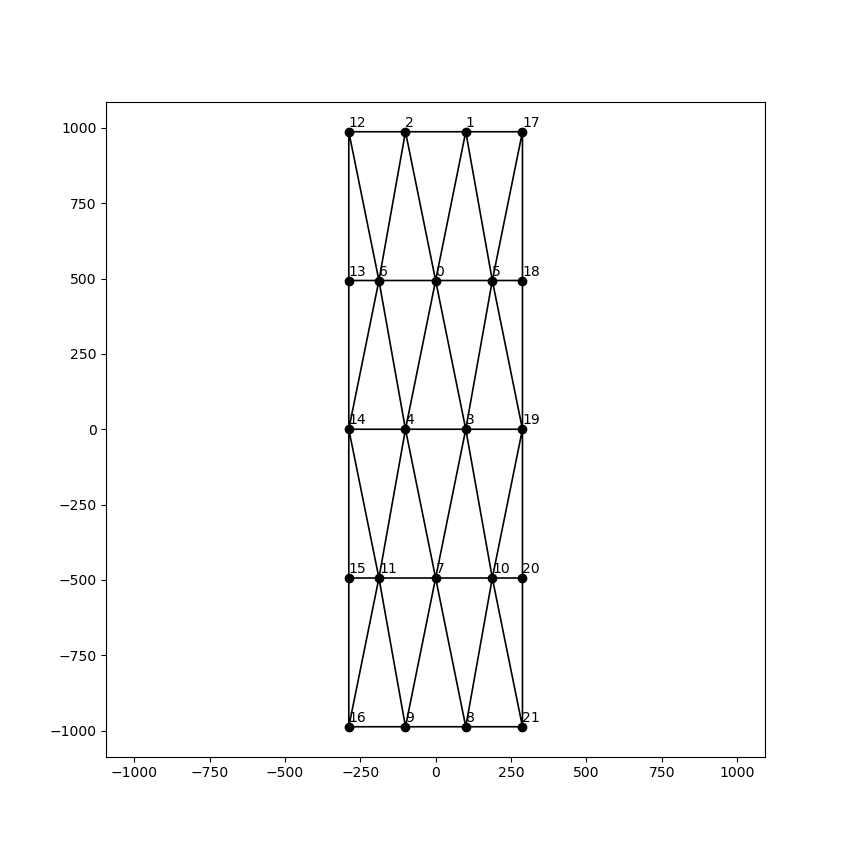

In [7]:
fig_pattern, _ = wbt4p.plot_formwork_plan(trimmed=True, type='pattern')

Plot tessellation with gamma= 89.99 °
Plot tessellation with gamma= 52.89 °
Fixed nodes list (fixed on bottom fixed plate):
-----------------------------------------------------------
Node num.: Coords. in folded state (x, y, z_diff)
0 :	(0,	456,	215)
1 :	(100,	934,	91)
2 :	(-100,	934,	91)
7 :	(0,	-456,	215)
8 :	(100,	-934,	91)
9 :	(-100,	-934,	91)
12 :	(-250,	866,	0)
16 :	(-250,	-866,	0)
17 :	(250,	866,	0)
21 :	(250,	-866,	0)


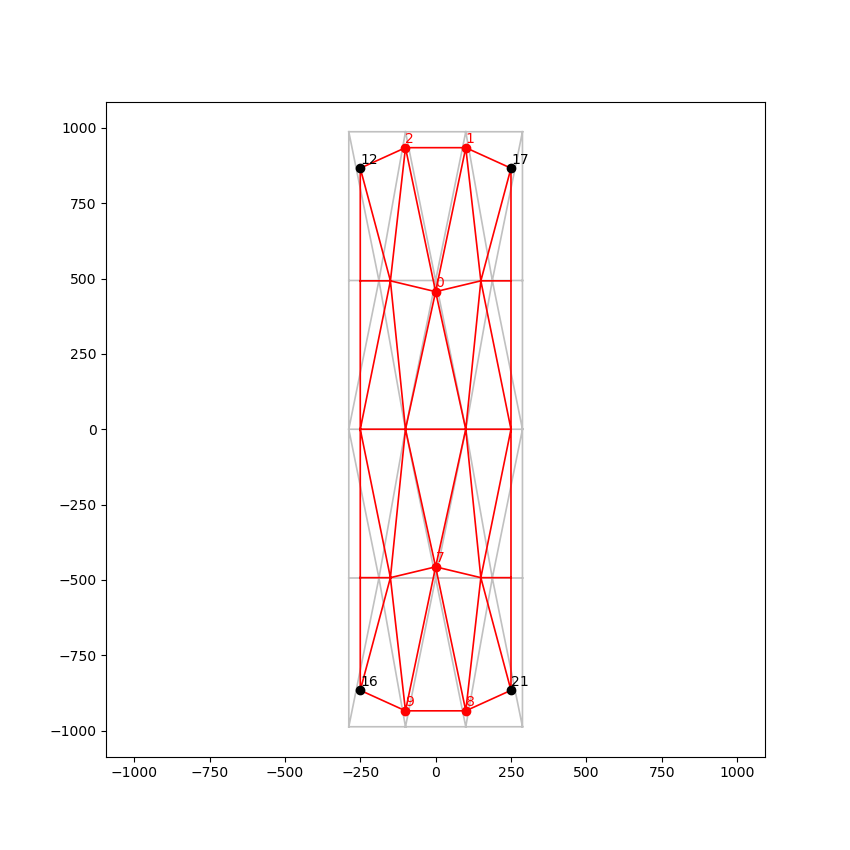

In [6]:
fig_fixed, _ = wbt4p.plot_formwork_plan(trimmed=True, type='fixed_base')

Plot tessellation with gamma= 89.99 °
Plot tessellation with gamma= 52.89 °
Moving nodes list (must be raised to fold the shell):
-----------------------------------------------------------
Node num.: Coords. in folded state (x, y, z_diff)
3 :	(100,	0,	113)
4 :	(-100,	0,	113)
5 :	(150,	492,	34)
6 :	(-150,	492,	34)
10 :	(150,	-492,	34)
11 :	(-150,	-492,	34)
13 :	(-250,	492,	34)
14 :	(-250,	0,	0)
15 :	(-250,	-492,	34)
18 :	(250,	492,	34)
19 :	(250,	0,	0)
20 :	(250,	-492,	34)


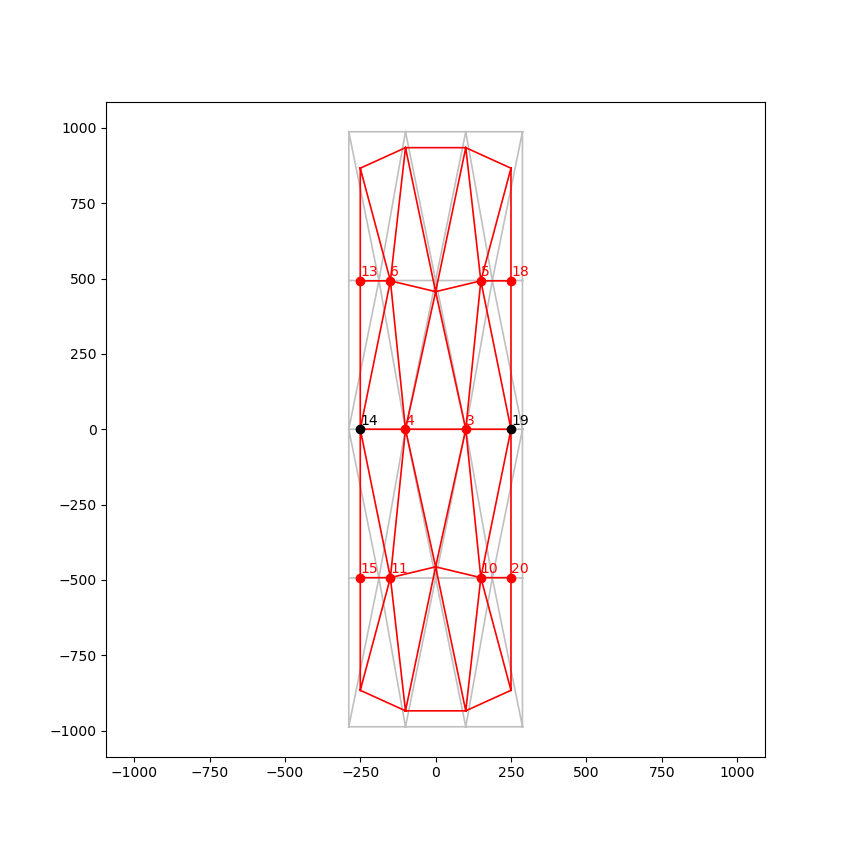

In [5]:
fig_moving, _ = wbt4p.plot_formwork_plan(trimmed=True, type='moving_top')

Plot tessellation with gamma= 60.0 °


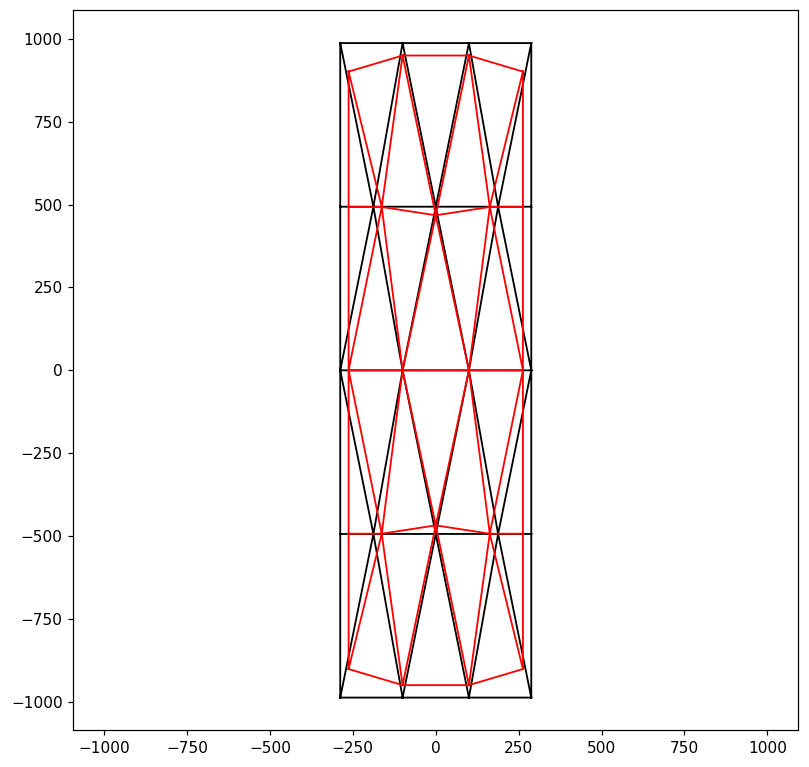

In [5]:
wbt4p.plot_folding_pattern(trimmed=True, ax=ax, gamma=np.pi/3, color='red')
fig

## Plot folding tracks

In [16]:
n_gamma = 30
X_gIa = np.zeros((n_gamma, *wbt4p.X_Ia_trimmed.shape))
for i, gamma in enumerate(np.linspace(np.pi/2-0.001, params['gamma'], n_gamma)):
    wbt4p.gamma = gamma
    X_gIa[i, ...] = wbt4p.X_Ia_trimmed
X_gIa.shape

(30, 22, 3)

In [17]:
diff = X_gIa[0, ...] - X_gIa[-1, ...]

In [18]:
start_end_dist = np.sqrt(np.sum(diff*diff, axis=1))
print(start_end_dist)
print(np.argmin(start_end_dist))
np.min(start_end_dist)

[ 82.76517017 204.57956452 204.57956452 113.21911621 113.21911621
  50.69211999  50.69211999  82.76517017 204.57956452 204.57956452
  50.69211999  50.69211999 314.8711094   50.71273374  38.08293107
  50.71269277 314.8711094  314.8711094   50.71273374  38.08293107
  50.71269277 314.8711094 ]
14


38.082931067040164

In [20]:
plot = k3d.plot()
for i in range(X_gIa.shape[1]):
    node_i_ga = X_gIa[:, i, :]
    plt_points = k3d.points(positions=node_i_ga,
                            point_size=20,
                            shader='3d',
                            color=0x3f6bc5)
    plot += plt_points
    
plt_points = k3d.lines(X_gIa[0, :, :], wbt4p.I_Fi_trimmed,
                            shader='mesh', width=8,
                            color=0xff0000)
plot += plt_points
plot

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [22]:
Areas = []
for params in valid_params:
    Areas.append((2*params['a'] + 2*params['c'])*(4*params['b'])*1e-6)
Areas

NameError: name 'valid_params' is not defined

In [23]:
# n_cells = wb_p.n_mid_cells
n_cells = 3
file_name = wb_p.var1['name'] + '_' + str(wb_p.var1['value']) + '_' + wb_p.var2['name'] + '_' + str(wb_p.var2['value']) + '_' + wb_p.var3['name'] + '_' + str(wb_p.var3['value'] ) +'_a_' + str(round(params['a'])) + '_' + str(n_cells) + '_cells.obj'
WBGeoUtils.export_obj_file(wbt4p, file_name)
file_name

NameError: name 'wb_p' is not defined

In [ ]:
wb_p.get_shell_height(wbt4p)

In [ ]:
wb_p.get_shell_width(wbt4p)

In [ ]:
wb_p.get_span(wbt4p)

### TODO: Pack ALL possible values in a up to 6 dimensions numpy array (design space array)

In [ ]:
path = np.array([[-500., 0., -1000.], [500., 0., -1000.]])
add_circle(wbt4p.pb.plot_fig, path = path, r=1000.)

In [ ]:
a = 100
wbt4p = WBTessellation4P(
#                          a=100,
#                          b = 5.492 * a, 
#                          c = 1.8466 * a, 
#                          gamma=np.deg2rad(54.53), 
#                          n_phi_plus=3, 
                        **valid_params_4[2],
                         n_x_plus=2, 
                         wireframe_width=5)
wbt4p.interact()

In [ ]:
WBGeoUtils.export_obj_file(wbt4p, 'span_2000_w_500_h_300_a_150_4_cells.obj')

In [ ]:
wb_p.get_shell_height(wbt4p, n_mid_cells=4)

In [ ]:
wb_p.get_shell_width(wbt4p, n_mid_cells=4)

In [ ]:
wb_p.get_span(wbt4p, n_mid_cells=4)

In [ ]:
wbt4p.wb_cell.R_0

## Generating graphics

In [ ]:
# Cameras for k3d
# [
#  x1,y1,z1, # position of the camera in xyz space
#  x2,y2,z2, # the point where camera is currently looking at
#  x3,y3,z3  # orientation (up direction), this vector cannot be [0,0,0])
# ]
shell_perspective = [92989.64822524686, -70795.1623293042, 31459.457304330528,
                     0, 0, -202.457763671875,
                     -0.19436494432910192, 0.0869502251902479, 0.9770680256539523]
shell_front_view = [140000, -3000, -1000,
                    0,     0, -200,
                    0,     0,   1]
shell_top_view = [0, -10000, 140000, 0, 0, -200, -1, 0, 0]

### Tested WB shell

In [ ]:
wbt4p = WBTessellation4P(a =125,  b = 550, c = 175, gamma=np.deg2rad(46), n_phi_plus=3, n_x_plus=2, wireframe_width=4)
wbt4p.interact()
k3d_plot = wbt4p.pb.plot_fig

k3d_plot.camera_fov = 1
k3d_plot.screenshot_scale = 5.5
k3d_plot.grid_visible = False
k3d_plot.camera = shell_perspective
# k3d_plot.camera = shell_front_view
# k3d_plot.camera = shell_top_view

### Parametric study shells

In [ ]:
valid_params_2_4_cells = [
{'a': 100.0, 'b': 523.0972790827252, 'c': 185.53831578999467, 'gamma': 0.941503562154671, 'n_phi_plus': 3}, 
{'a': 150.0, 'b': 528.9869047532335, 'c': 188.42964733716423, 'gamma': 0.559480433250358, 'n_phi_plus': 3},
{'a': 100.0, 'b': 264.0443060812336, 'c': 152.74500755927858, 'gamma': 1.3808286675705175, 'n_phi_plus': 5},
{'a': 150.0, 'b': 267.29565489071757, 'c': 117.65995940135527, 'gamma': 1.015897789314392, 'n_phi_plus': 5}
]

In [ ]:
wbt4p = WBTessellation4P(
#                          a=100,
#                          b = 5.492 * a, 
#                          c = 1.8466 * a, 
#                          gamma=np.deg2rad(54.53), 
#                          n_phi_plus=3, 
                        **valid_params_2_4_cells[0],
                         n_x_plus=2, 
                         wireframe_width=4)
wbt4p.interact()
k3d_plot = wbt4p.pb.plot_fig

k3d_plot.camera_fov = 1
k3d_plot.screenshot_scale = 5.5
k3d_plot.grid_visible = False
# k3d_plot.camera = shell_perspective
# k3d_plot.camera = shell_front_view
k3d_plot.camera = shell_top_view

# add_circle(k3d_plot, path = np.array([[-4500, 0, -4120], [4500, 0, -4120]]), r=4070, wireframe=False)

## Attempt to get params for target geometry using Minimization

In [ ]:
tested_wb_shell = dict(a =a,  b = b, c = c, gamma=gamma, n_phi_plus=3, n_x_plus=2, wireframe_width=5)
wbt4p = WBTessellation4P(**tested_wb_shell)
wbt4p.interact()

In [ ]:
path = np.array([[-4000, 0, -4000], [4000, 0, -4000]])
add_circle(wbt4p.pb.plot_fig, path = path, r=4200)

In [ ]:
# Cell h in generic way
cell_X_Ia = wbt4p.wb_cell.X_Ia
mid_56 = (cell_X_Ia[5] + cell_X_Ia[6])/2
v_0_mid_56 = mid_56 - cell_X_Ia[0]
cell_h = np.sqrt(np.sum(v_0_mid_56 * v_0_mid_56))
cell_h

In [ ]:
# Cell h for symmetric cell with parameterization with O is origin
cell_h = wbt4p.wb_cell.X_Ia[5][2]
cell_h

In [ ]:
span = (wbt4p.X_Ia[1] - wbt4p.X_Ia[8])[1]
span

In [ ]:
print(wbt4p.wb_cell.symb.R_0)

In [ ]:
h = self.c * np.cos(gamma)

In [ ]:
get_structural_params_residual(125,  550, 175, np.deg2rad(46))

In [ ]:
from scipy.optimize import minimize

# def get_structural_params(wbt4p):
#     h = wbt4p.wb_cell.X_Ia[5][2]
#     k = 1/wbt4p.wb_cell.R_0
#     span = (wbt4p.X_Ia[1] - wbt4p.X_Ia[8])[1]
#     return h, k, span

def get_structural_params_residual(params):
    h_target = 121.5652 # mm
    k_target = 1/-2024.44 # 1/mm # R_0 = -1/2024.44
    span_target = 2118.1638 # mm
    R_0_target = -2024.44

    a, b, c, gamma = params
    h = c * np.cos(gamma)
    R_0 = a*(-tan(gamma) + 1/cos(gamma)) + sqrt(-a**2*(-tan(gamma) + 1/cos(gamma))**2 + b**2)*(-2*a*(-(a*tan(gamma) - a/cos(gamma) + c*cos(gamma))**2/(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2) + 1)*tan(gamma) + 2*a*(-(a*tan(gamma) - a/cos(gamma) + c*cos(gamma))**2/(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2) + 1)/cos(gamma) + a*(-tan(gamma) + 1/cos(gamma)) + a*tan(gamma) - a/cos(gamma) - c*cos(gamma) + sqrt(2*a**2*sin(gamma) + a**2*cos(gamma)**2 - 2*a**2 + b**2*cos(gamma)**2)*sin(2*np.arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))/np.abs(cos(gamma)))/(a*sin(2*np.arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))*tan(gamma) - a*sin(2*np.arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))/cos(gamma) - sqrt(-a**2*(-tan(gamma) + 1/cos(gamma))**2 + b**2) + sqrt(-a**2*sin(gamma)**2 + 2*a**2*sin(gamma) - a**2 - b**2*sin(gamma)**2 + b**2)*cos(2*np.arcsin((a*tan(gamma) - a/cos(gamma) + c*cos(gamma))/sqrt(2*a*c*sin(gamma) - 2*a*c + b**2 + c**2*cos(gamma)**2)))*np.abs(cos(gamma))/cos(gamma)**2)
    print('h, R0: ', h , R_0)
    print('Diff: ', h - h_target, R_0 - R_0_target)
    print('Result = ', np.abs(h - h_target) + np.abs(R_0 - R_0_target))
    return np.abs(h - h_target) + np.abs(R_0 - R_0_target)
#     return np.abs(R_0 - R_0_target)

def minimize_tesssel_params():
#     x0 = np.array([125.0,  550.0, 175.0, np.deg2rad(46)])
    x0 = np.array([500.0,  500.0, 100.0, np.deg2rad(20)])
#     x0 = np.arange(4)
#     try:
    res = minimize(get_structural_params_residual, x0, method='Nelder-Mead', tol=1e-2, bounds=((0.01, 1e10), (0.01, 1e10), (0.01, 1e10), (0.01, np.pi/2 - 0.01)))
#     except:
#         print('Error while minimizing!')
#         return np.array([0, 0])
    sol = res.x
    return sol

a, b, c, gamma = minimize_tesssel_params()
a, b, c, gamma

In [ ]:
wbt4p.wb_cell.R_0

## Visualizing

In [ ]:
# Cameras for k3d
# [
#  x1,y1,z1, # position of the camera in xyz space
#  x2,y2,z2, # the point where camera is currently looking at
#  x3,y3,z3  # orientation (up direction), this vector cannot be [0,0,0])
# ]
shell_side_view = [11206.956414346325, -9420.91749815528, 1858.3024602542291,
                   0.000244140625, -0.00048828125, -2129.4488372802734,
                  -0.20092161158887856, 0.08487577463430307, 0.9759234646614198]
cell_front_view = [0, -2000, 2000,
                   0,     0,   0,
                   0,     0,   1]
shell_front_view = [19000, 0, -1000,
                    0,     0, -2500,
                    0,     0,   1]
shell_top_view = [0, 0, 900000, 0, 0, -2500, -1, 0, 0]

In [ ]:
# FOV = 1
# Cameras for k3d
# [
#  x1,y1,z1, # position of the camera in xyz space
#  x2,y2,z2, # the point where camera is currently looking at
#  x3,y3,z3  # orientation (up direction), this vector cannot be [0,0,0])
# ]
shell_side_view = [591365.2482393435, -497120.07834650716, 208294.99640853348,
 0.000244140625, -0.00048828125, -2129.4488372802734, 
 -0.20092161158887856, 0.08487577463430307, 0.9759234646614198]

cell_front_view = [0, -2000, 2000,
                   0,     0,   0,
                   0,     0,   1]
shell_front_view = [800000, 0, -2000, 0, 0, -2000, 0, 0, 1]
shell_top_view = [0, 0, 900000, 0, 0, -2500, -1, 0, 0]

In [ ]:
path = np.array([[-4000, 0, -4000], [4000, 0, -4000]])
add_circle(wbt4p.pb.plot_fig, path = path, r=4200)

In [ ]:
# wbt4p.pb.plot_fig.camera = shell_front_view
wbt4p.pb.plot_fig.camera = shell_top_view
# wbt4p.pb.plot_fig.camera = shell_side_view
# wbt4p.pb.plot_fig.camera = cell_front_view

In [ ]:
wbt4p = WBTessellation4P(a = 500, b = 1000, c = 500, gamma = 1.0, n_phi_plus=7, n_x_plus = 5, wireframe_width=10)
wbt4p.interact()
wbt4p.pb.plot_fig.screenshot_scale = 5.5
wbt4p.pb.plot_fig.grid_visible = False
wbt4p.pb.plot_fig.camera = shell_side_view